# IMPORT SECTION
<li> designate file location of data
<li> import libraries
<li> set options
<li> load data

## Designate File Location of Data to Import

#### NOTE:  attempted to save csv file as UTF 8 but still generated: 
        "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte"
####    adjusted csv header to delete the degree symbol in the two temperature columns.  Replaced symbol with a "d".

In [1]:
#FileLocation = r'C:\Users\robli\OneDrive - The University of Texas at Dallas\MBA\5th Semester\6341 Applied Machine Learning\Assignments\Assignment 1\SeoulBikeData.csv'

In [2]:
#    import necessary libraries 
import numpy as np
import pandas as pd
import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#    option modifications
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

ShowWork = True  #Set to true if you want to see work, False if work should be hidden

#    import data
pdBikeData = pd.read_csv("SeoulBikeData.csv")
##    attempted to save csv file as UTF 8 but still generated: "UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb0 in position 40: invalid start byte"
##    adjusted csv header to delete the degree symbol in the two temperature columns.  Replaced symbol with a "d".

# DEFINE GLOBAL CONTROL FUNCTIONS
<li> printif - print statement used to show work
<li> displayif - display statement used to show work

In [3]:
def printif(ShowWork = True, StringToPrint=""):
    if ShowWork: print(StringToPrint)
        
def displayif(ShowWork = True, dataframe = []):
    if ShowWork: display(dataframe)

## Manipulate Data As Needed (Global)
<li>Verify no nulls
<li>Verify data structure integrity - Fix if needed
<li>Transform Categorical Data 

In [4]:
#    Check for null values
printif(ShowWork, "Total Amount of Null Values in Data:" + str(pdBikeData.isnull().sum().sum()))
#    Inspect data
printif(ShowWork, "Original Header Output:" )
displayif(ShowWork, pdBikeData.head())

##   1st column header was not included.  Add "Date" as first column header and remove "Unnamed: 13"
pdBikeData.columns = ["Date"] + pdBikeData.columns[0:-1].tolist()

#    Verify formating now correct
printif(ShowWork, '\n\nAfter adjusting the Header to include Date:')
displayif(ShowWork, pdBikeData.head())

printif(ShowWork, "\n\nNow we need to transform all of the Categorical Data to include in Regression...")
#    Convert four Seasons Categorical Data to 3 individual columns
printif(ShowWork, "The Seasons categories are:" )
printif(ShowWork, pdBikeData['Seasons'].unique())
printif(ShowWork, "Creating Spring, Summer, and Autumn columns")
#    Add 3 Columns (exclude 4th column as it is redundant when you know the other 3)
pdBikeData.insert(12, 'Winter', (pdBikeData[["Seasons"]] == "Winter") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Autumn', (pdBikeData[["Seasons"]] == "Autumn") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Summer', (pdBikeData[["Seasons"]] == "Summer") * 1, allow_duplicates=False)
pdBikeData.insert(12, 'Spring', (pdBikeData[["Seasons"]] == "Spring") * 1, allow_duplicates=False)

#    Delete Original Seasons Column
del pdBikeData['Seasons']
#    Add Column for intercept X0=1 value
pdBikeData.insert(2, "X0", 1, allow_duplicates=False)

#    Convert Holiday column to 1/0 representation
printif(ShowWork, "\nThe Holiday categories are:" )
printif(ShowWork, pdBikeData['Holiday'].unique())
printif(ShowWork, "Converting to 1/0 (Holiday/No Holiday)")
pdBikeData['Holiday'] = (pdBikeData['Holiday']=='Holiday') * 1

#    Convert Functioning Day column to 1/0 representation
printif(ShowWork, "\nThe Functioning Day categories are:" )
printif(ShowWork, pdBikeData['Functioning Day'].unique())
printif(ShowWork, "Converting to 1/0 (Yes/No)")
pdBikeData['Functioning Day']=(pdBikeData['Functioning Day']=='Yes') * 1



print("\n\nOur updated dataframe ready for regression:")
display(pdBikeData)

Total Amount of Null Values in Data:0
Original Header Output:


,Rented Bike Count,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Unnamed: 13
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes




After adjusting the Header to include Date:


,Date,Rented Bike Count,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes




Now we need to transform all of the Categorical Data to include in Regression...
The Seasons categories are:
['Winter' 'Spring' 'Summer' 'Autumn']
Creating Spring, Summer, and Autumn columns

The Holiday categories are:
['No Holiday' 'Holiday']
Converting to 1/0 (Holiday/No Holiday)

The Functioning Day categories are:
['Yes' 'No']
Converting to 1/0 (Yes/No)


Our updated dataframe ready for regression:


,Date,Rented Bike Count,X0,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,Holiday,Functioning Day
0,1/12/2017,254,1,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
1,1/12/2017,204,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
2,1/12/2017,173,1,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1
3,1/12/2017,107,1,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
4,1/12/2017,78,1,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,1,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0,1
8756,30/11/2018,764,1,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8757,30/11/2018,694,1,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8758,30/11/2018,712,1,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0,1


In [5]:
# Create DayofWeek indicator 
DayofWeek = pd.to_datetime(pdBikeData["Date"], errors='ignore', format = '%mm%dd%YYYY')
Day = pd.to_datetime(DayofWeek, errors='ignore')
X=pdBikeData["X0"].copy()
for i in range (0, len(pdBikeData)):
    X[i] = Day[i].weekday()

pdBikeData.insert(2, 'DayOfWeek', X, allow_duplicates=False)
pdBikeData

C:\Users\robli\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\robli\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\robli\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\robli\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/12/2017' in DD/MM/YYYY format. Provide format or specif

,Date,Rented Bike Count,DayOfWeek,X0,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,Holiday,Functioning Day
0,1/12/2017,254,3,1,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
1,1/12/2017,204,3,1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
2,1/12/2017,173,3,1,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1
3,1/12/2017,107,3,1,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
4,1/12/2017,78,3,1,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4,1,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0,1
8756,30/11/2018,764,4,1,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8757,30/11/2018,694,4,1,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8758,30/11/2018,712,4,1,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0,1


### Create Train Test Split After Initial Global Manipulating Is Done

In [6]:
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.3 , random_state=42)

display(X_train)

,Date,Rented Bike Count,DayOfWeek,X0,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,Holiday,Functioning Day
1444,30/01/2018,33,1,1,4,-11.1,50,1.2,1986,-19.4,0.00,0.0,0.0,0,0,0,1,0,1
1652,7/2/2018,218,0,1,20,-5.8,44,2.1,1994,-16.1,0.00,0.0,0.0,0,0,0,1,0,1
7496,9/10/2018,0,0,1,8,11.4,66,0.8,1991,5.2,0.18,0.0,0.0,0,0,1,0,1,0
1893,17/02/2018,133,5,1,21,-2.3,38,2.3,2000,-14.7,0.00,0.0,0.0,0,0,0,1,1,1
3880,11/5/2018,1496,0,1,16,19.1,54,3.2,542,9.5,0.94,0.0,0.0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,27/07/2018,1507,4,1,22,29.9,74,2.0,1201,24.7,0.00,0.0,0.0,0,1,0,0,0,1
5191,5/7/2018,828,0,1,7,23.5,90,0.5,445,21.7,0.05,0.5,0.0,0,1,0,0,0,1
5390,13/07/2018,999,4,1,14,29.5,62,2.7,1941,21.4,1.79,0.0,0.0,0,1,0,0,0,1
860,5/1/2018,322,1,1,20,-3.4,51,1.1,1391,-12.1,0.00,0.0,0.0,0,0,0,1,0,1


### Add a Day of the Week Mean Evaluator

In [7]:
#Redo

#DayofWeek = pd.to_datetime(pdBikeData["Date"], errors='ignore', format = '%mm%dd%YYYY')
#Day = pd.to_datetime(DayofWeek, errors='ignore')
#X=pdBikeData["X0"].copy()
#for i in range (0, len(pdBikeData)):
#    X[i] = Day[i].weekday()

#pdBikeData.insert(2, 'DayOfWeek', X, allow_duplicates=False)

data = {'DayOfWeek': [0,1,2,3,4,5,6],
        'Mean': [X_train[(X_train["DayOfWeek"]==0)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==1)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==2)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==3)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==4)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==5)]["Rented Bike Count"].mean(),
                 X_train[(X_train["DayOfWeek"]==6)]["Rented Bike Count"].mean()
                ]
       }
data
DOWData = pd.DataFrame(data)

DOWData.insert (2, "MeanAdj", DOWData["Mean"]-DOWData["Mean"].mean(), allow_duplicates = False)

printif(ShowWork,DOWData)
pdBikeData.insert(4, 'DOWAdjust', 0, allow_duplicates=False)
#X_train.insert(4, 'DOWAdjust', 0, allow_duplicates=False)
#X_test.insert(4, 'DOWAdjust', 0, allow_duplicates=False)

for i in range(0,len(pdBikeData)):
    pdBikeData.iloc[i,4] = DOWData.iloc[pdBikeData.iloc[i,2],2]
#for i in range(0,len(X_train)):
#    X_train.iloc[i,4] = DOWData.iloc[X_train.iloc[i,2],2]
#for i in range(0,len(pdBikeData)):
#    X_test.iloc[i,4] = DOWData.iloc[X_test.iloc[i,2],2]

display(pdBikeData)
#display(X_train)
#display(X_test)

   DayOfWeek   Mean    MeanAdj
0      0      714.043   6.466 
1      1      666.872 -40.705 
2      2      710.771   3.194 
3      3      741.941  34.364 
4      4      762.989  55.413 
5      5      738.361  30.784 
6      6      618.060 -89.517 


,Date,Rented Bike Count,DayOfWeek,X0,DOWAdjust,Hour,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,Holiday,Functioning Day
0,1/12/2017,254,3,1,34.364,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
1,1/12/2017,204,3,1,34.364,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
2,1/12/2017,173,3,1,34.364,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0,1
3,1/12/2017,107,3,1,34.364,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0,1
4,1/12/2017,78,3,1,34.364,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4,1,55.413,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0,1
8756,30/11/2018,764,4,1,55.413,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8757,30/11/2018,694,4,1,55.413,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0,1
8758,30/11/2018,712,4,1,55.413,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0,1


### Convert Hour to RankedHour 
   <li>Convert Hour to RankedHour based on Average for the hour

[6, 5, 4, 2, 0, 1, 3, 8, 17, 10, 7, 9, 12, 13, 14, 15, 18, 21, 23, 22, 20, 19, 16, 11]
0        6
1        5
2        4
3        2
4        0
        ..
8755    22
8756    20
8757    19
8758    16
8759    11
Name: Hour, Length: 8760, dtype: int64


,HourRentalAvg,rankoutput
0,541.317,6
1,445.880,5
2,301.622,4
3,196.698,2
4,129.837,0
5,139.743,1
6,280.523,3
7,567.953,8
8,944.127,17
9,660.713,10


Takeaway here is mostly linear relationship except for peak hour. 
Create Two Hour Columns: one for rank, one for peak. 
This may vary depending on the random state.


<AxesSubplot:xlabel='rankoutput', ylabel='HourRentalAvg'>

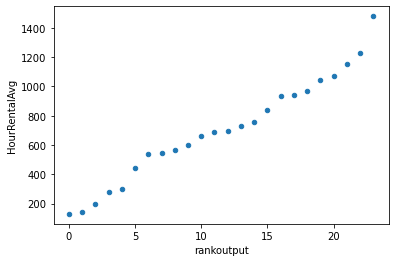

In [8]:
#Redo
#X_train, X_test, y_train, y_test

#Get the mean for each hour in the training set
HourRentalAvg = [0]*24
for i in range (0,24):
    HourRentalAvg[i] = X_train[(X_train["Hour"]==i)]["Rented Bike Count"].mean()

#Rank the mean of each hour in the training set
rankoutput = [0] * len(HourRentalAvg)
for i, x in enumerate(sorted(range(len(HourRentalAvg)), key=lambda y: HourRentalAvg[y])):
    rankoutput[x] = i
printif(ShowWork, rankoutput)

#Create list containing matching Ranks for every hour
AvgHourRank = pdBikeData["Hour"].copy()
for i in range (0,len(pdBikeData)):
    AvgHourRank[i] = rankoutput[pdBikeData.iloc[i,5]]
printif(ShowWork, AvgHourRank) 

#combine hourrental avg and rank into a dataframe
zipped = list(zip(HourRentalAvg, rankoutput))
AVGHOUR= pd.DataFrame(zipped, columns = ['HourRentalAvg', 'rankoutput'])
displayif (ShowWork,AVGHOUR)

print("Takeaway here is mostly linear relationship except for peak hour. \nCreate Two Hour Columns: one for rank, one for peak. \nThis may vary depending on the random state.")
displayif(ShowWork, AVGHOUR.plot(x=1, y= 0, kind='scatter'))

pdBikeData.insert(6, 'HourRank', AvgHourRank, allow_duplicates=False)
pdBikeData.insert(7, 'PeakHours', (pdBikeData[["HourRank"]] > 22) *1 , allow_duplicates=False)

In [9]:
display (pdBikeData.head(24))

,Date,Rented Bike Count,DayOfWeek,X0,DOWAdjust,Hour,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,Holiday,Functioning Day
0,1/12/2017,254,3,1,34.364,0,6,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,0,1,0,1
1,1/12/2017,204,3,1,34.364,1,5,0,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,0,0,1,0,1
2,1/12/2017,173,3,1,34.364,2,4,0,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,0,1,0,1
3,1/12/2017,107,3,1,34.364,3,2,0,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,0,0,1,0,1
4,1/12/2017,78,3,1,34.364,4,0,0,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,0,1,0,1
5,1/12/2017,100,3,1,34.364,5,1,0,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,0,0,1,0,1
6,1/12/2017,181,3,1,34.364,6,3,0,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,0,0,1,0,1
7,1/12/2017,460,3,1,34.364,7,8,0,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,0,1,0,1
8,1/12/2017,930,3,1,34.364,8,17,0,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,0,1,0,1
9,1/12/2017,490,3,1,34.364,9,10,0,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,0,0,1,0,1


### Check to see if there is linearity in Seasons for further consolidation
   <li>Possibly consolidate seasons
   <li>Check to see if spring summer autumn winter are different?

In [10]:
#Get the hourly means for each season in the training set
SpringMean = X_train[X_train["Spring"] ==1]["Rented Bike Count"].mean()
SummerMean = X_train[X_train["Summer"] ==1]["Rented Bike Count"].mean()
AutumnMean = X_train[X_train["Autumn"] ==1]["Rented Bike Count"].mean()
WinterMean = X_train[X_train["Winter"] ==1]["Rented Bike Count"].mean()

printif(ShowWork,"SpringMean:" + str(SpringMean) +"\n SummerMean:" + str(SummerMean) +"\n AutumnMean:" + str(AutumnMean) + "\n WinterMean:" + str(WinterMean))

pdBikeData.insert(20, "SeasonalMeanAdj", (pdBikeData["Spring"]*SpringMean + pdBikeData["Summer"]*SummerMean + pdBikeData["Autumn"]*AutumnMean + pdBikeData["Winter"]*WinterMean)/SummerMean)

pdBikeData

SpringMean:721.3258785942492
 SummerMean:1035.8969539857421
 AutumnMean:826.1104613385315
 WinterMean:225.2107744107744


,Date,Rented Bike Count,DayOfWeek,X0,DOWAdjust,Hour,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,SeasonalMeanAdj,Holiday,Functioning Day
0,1/12/2017,254,3,1,34.364,0,6,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
1,1/12/2017,204,3,1,34.364,1,5,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
2,1/12/2017,173,3,1,34.364,2,4,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0.217,0,1
3,1/12/2017,107,3,1,34.364,3,2,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
4,1/12/2017,78,3,1,34.364,4,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4,1,55.413,19,22,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8756,30/11/2018,764,4,1,55.413,20,20,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8757,30/11/2018,694,4,1,55.413,21,19,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8758,30/11/2018,712,4,1,55.413,22,16,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0.797,0,1


In [11]:
pdBikeData

,Date,Rented Bike Count,DayOfWeek,X0,DOWAdjust,Hour,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,SeasonalMeanAdj,Holiday,Functioning Day
0,1/12/2017,254,3,1,34.364,0,6,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
1,1/12/2017,204,3,1,34.364,1,5,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
2,1/12/2017,173,3,1,34.364,2,4,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0.217,0,1
3,1/12/2017,107,3,1,34.364,3,2,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
4,1/12/2017,78,3,1,34.364,4,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4,1,55.413,19,22,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8756,30/11/2018,764,4,1,55.413,20,20,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8757,30/11/2018,694,4,1,55.413,21,19,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8758,30/11/2018,712,4,1,55.413,22,16,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0.797,0,1


In [12]:
BeforeDrop=pdBikeData.copy()
BeforeDrop

,Date,Rented Bike Count,DayOfWeek,X0,DOWAdjust,Hour,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Spring,Summer,Autumn,Winter,SeasonalMeanAdj,Holiday,Functioning Day
0,1/12/2017,254,3,1,34.364,0,6,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
1,1/12/2017,204,3,1,34.364,1,5,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
2,1/12/2017,173,3,1,34.364,2,4,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,0,1,0.217,0,1
3,1/12/2017,107,3,1,34.364,3,2,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
4,1/12/2017,78,3,1,34.364,4,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,0,1,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4,1,55.413,19,22,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8756,30/11/2018,764,4,1,55.413,20,20,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8757,30/11/2018,694,4,1,55.413,21,19,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,0,1,0,0.797,0,1
8758,30/11/2018,712,4,1,55.413,22,16,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,0,1,0,0.797,0,1


In [13]:
del pdBikeData['Date']
del pdBikeData['DayOfWeek']
del pdBikeData['Hour']
del pdBikeData['Spring']
del pdBikeData['Summer']
del pdBikeData['Autumn']
del pdBikeData['Winter']
pdBikeData

,Rented Bike Count,X0,DOWAdjust,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),SeasonalMeanAdj,Holiday,Functioning Day
0,254,1,34.364,6,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.217,0,1
1,204,1,34.364,5,0,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.217,0,1
2,173,1,34.364,4,0,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.217,0,1
3,107,1,34.364,2,0,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.217,0,1
4,78,1,34.364,0,0,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,1,55.413,22,0,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.797,0,1
8756,764,1,55.413,20,0,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.797,0,1
8757,694,1,55.413,19,0,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0.797,0,1
8758,712,1,55.413,16,0,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.797,0,1


0: DOWAdjust
1: HourRank
2: PeakHours
3: Seasonal Adjust
4: Holiday
5: Functioning Day
6: Rainfall
7: Snowfall

Temperature? (This could be highly correlated with season)

## Visualize The Relationships Between Rentals and NonConverted Variables

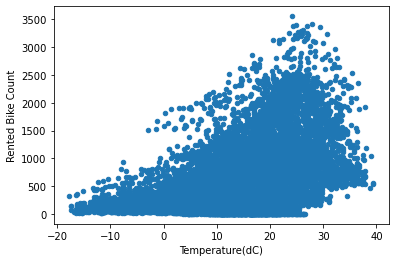

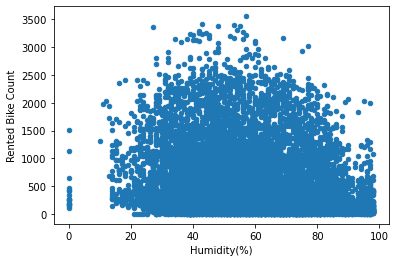

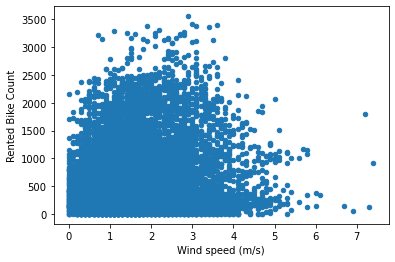

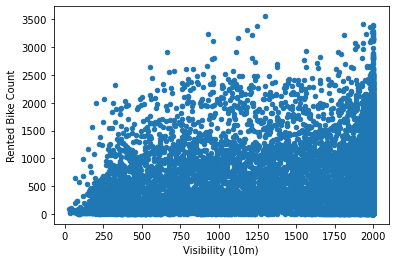

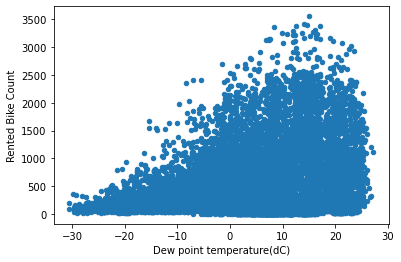

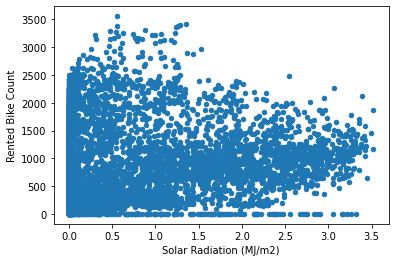

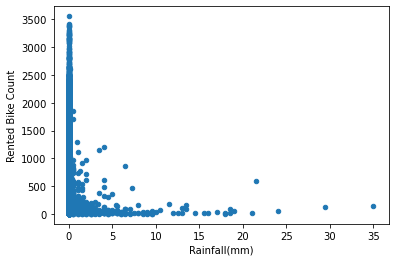

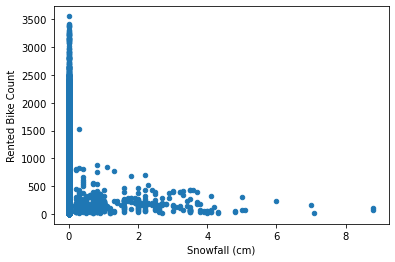

In [14]:
#    Show scatter plots for non binary columns
#for i in range(4,12):
#    pdBikeData.plot(x=i, y= "Rented Bike Count", kind='scatter')

for i in range(5,13):
    pdBikeData.plot(x=i, y= "Rented Bike Count", kind='scatter')

## Final Scaling For Regression Model

In [15]:
#Reset the train set
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.3, random_state=42)

#Scale all olumns that need 
for i in ("DOWAdjust","HourRank","Temperature(dC)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(dC)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)"):
    #print(i,temp[i].mean(), temp[i].max(),temp[i].min())
    pdBikeData[i] = (pdBikeData[i] - X_train[i].mean())/(X_train[i].max()-X_train[i].mean())
display(pdBikeData)


,Rented Bike Count,X0,DOWAdjust,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),SeasonalMeanAdj,Holiday,Functioning Day
0,254,1,0.626,-0.481,0,-0.701,-0.533,0.082,1.000,-0.946,-0.198,-0.006,-0.009,0.217,0,1
1,204,1,0.626,-0.568,0,-0.712,-0.508,-0.165,1.000,-0.946,-0.198,-0.006,-0.009,0.217,0,1
2,173,1,0.626,-0.655,0,-0.731,-0.483,-0.129,1.000,-0.950,-0.198,-0.006,-0.009,0.217,0,1
3,107,1,0.626,-0.829,0,-0.739,-0.458,-0.147,1.000,-0.946,-0.198,-0.006,-0.009,0.217,0,1
4,78,1,0.626,-1.003,0,-0.731,-0.558,0.100,1.000,-0.989,-0.198,-0.006,-0.009,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,1,1.000,0.913,0,-0.339,-0.609,0.153,0.811,-0.629,-0.198,-0.006,-0.009,0.797,0,1
8756,764,1,1.000,0.739,0,-0.370,-0.533,0.100,1.000,-0.611,-0.198,-0.006,-0.009,0.797,0,1
8757,694,1,1.000,0.652,0,-0.400,-0.483,-0.253,0.943,-0.611,-0.198,-0.006,-0.009,0.797,0,1
8758,712,1,1.000,0.390,0,-0.420,-0.433,-0.129,0.749,-0.607,-0.198,-0.006,-0.009,0.797,0,1


Correlation Matrix

In [16]:
CorData = pdBikeData.copy()
CorData.drop(columns = "X0", axis = 1, inplace = True)
corr = CorData.corr().round(3)
corr.style.background_gradient(cmap='coolwarm')

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\robli\AppData\Local\Temp\ipykernel_31908\3745152507.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Rented Bike Count,DOWAdjust,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),SeasonalMeanAdj,Holiday,Functioning Day
Rented Bike Count,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
DOWAdjust,0.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
HourRank,0.53,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
PeakHours,0.26,-0.00,0.35,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Temperature(dC),0.54,0.02,0.14,0.04,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Humidity(%),-0.20,0.02,-0.28,-0.07,0.16,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Wind speed (m/s),0.12,0.02,0.34,0.10,-0.04,-0.34,nan,nan,nan,nan,nan,nan,nan,nan,nan
Visibility (10m),0.20,-0.00,0.11,0.04,0.04,-0.54,0.17,nan,nan,nan,nan,nan,nan,nan,nan
Dew point temperature(dC),0.38,0.02,-0.00,0.00,0.91,0.54,-0.18,-0.18,nan,nan,nan,nan,nan,nan,nan
Solar Radiation (MJ/m2),0.26,0.01,0.18,-0.04,0.35,-0.46,0.33,0.15,0.09,nan,nan,nan,nan,nan,nan


## Update Train Test Split After All Manipulating Is Done

In [17]:
#pdBikeNoY= pdBikeData.copy()
#del pdBikeNoY['Rented Bike Count']
X_train, X_test, y_train, y_test = train_test_split(pdBikeData, pdBikeData['Rented Bike Count'], test_size = 0.3, random_state=42)
#TrainSet = pdBikeData.iloc[:200, :]
#XValues = pdBikeData.iloc[:m,StartXColumn:EndXColumn]
#ActualY =pdBikeData.iloc[:m,YColumn]
#TrainSet

display(X_train)

,Rented Bike Count,X0,DOWAdjust,HourRank,PeakHours,Temperature(dC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(dC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),SeasonalMeanAdj,Holiday,Functioning Day
1444,33,1,-0.706,-1.003,0,-0.928,-0.206,-0.094,0.975,-1.024,-0.198,-0.006,-0.009,0.217,0,1
1652,218,1,0.131,0.739,0,-0.724,-0.357,0.065,0.989,-0.881,-0.198,-0.006,-0.009,0.217,0,1
7496,0,1,0.131,0.477,0,-0.062,0.196,-0.165,0.984,0.044,-0.137,-0.006,-0.009,0.797,1,0
1893,133,1,0.563,0.652,0,-0.589,-0.508,0.100,1.000,-0.820,-0.198,-0.006,-0.009,0.217,1,1
3880,1496,1,0.131,0.565,0,0.234,-0.106,0.259,-1.595,0.231,0.122,-0.006,-0.009,0.696,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1507,1,1.000,0.390,0,0.650,0.397,0.047,-0.422,0.891,-0.198,-0.006,-0.009,1.000,0,1
5191,828,1,0.131,-0.306,0,0.404,0.799,-0.218,-1.768,0.761,-0.181,0.015,-0.009,1.000,0,1
5390,999,1,1.000,0.216,0,0.635,0.095,0.171,0.895,0.748,0.411,-0.006,-0.009,1.000,0,1
860,322,1,-0.706,0.739,0,-0.631,-0.181,-0.112,-0.084,-0.707,-0.198,-0.006,-0.009,0.217,0,1


# Multivariate Full Version 

### Define Functions
    PredictYFromBetas : Perform Y prediction from given Beta list
    BetaUpdates: Update the Beta list by applying Gradient Descent to Test set and designated control variables
    GradientDescentAlgorith: Runs a gradient descent driven linear regression based on given inputs

In [18]:
def PredictYFromBetas(npBeta=[0], XValues = [0]):
    PredictionValues = (npBeta * XValues).sum(axis=1) 
    return PredictionValues

def BetaUpdates(npBeta=[], alpha = 0, m = 0, n = 0, PredictedY =[], ActualY=[], XValues = []):
    #m= number of observations
    #n= number of variables 
    k = 0 # Beta location
    
    #Error Prevention
    if (len(PredictedY) == 0 or len(ActualY) == 0 or len(npBeta) == 0 or len(XValues) == 0 
        or alpha == 0 or m==0 or n==0):
        print ("ERROR: Please provide all function variables")
        return[0]
    
    NewBeta = npBeta.copy()
    #Calculate All Betas
    SumPortion = 0
    for j in range (0,n):
        SumPortion = ((PredictedY-ActualY) * XValues.iloc[:,j]).sum()
        NewBeta[j] = npBeta[j] - alpha/m * SumPortion
    #print("Original Betas:", npBeta[0:n])
    #print("New Betas:     ", NewBeta[0:n])
    return NewBeta

def GradientDescentAlgorithm (X_train=[], X_test=[], y_train=[], y_test=[], 
                              alpha=0, ConvergenceTarget = 0, MaxIterations =0, ShowWork=False):
    
    #Error Prevention
    if (len(X_train) == 0 or len(X_test) == 0 or len(y_train) == 0 or len(y_test) == 0 
        or alpha == 0 or ConvergenceTarget== 0 or MaxIterations == 0):
        print ("ERROR: Please provide all function variables")
        return
    
    printif(ShowWork, "alpha: " + str(alpha))
    printif(ShowWork, "ConvergenceTarget: " + str(ConvergenceTarget))
    printif(ShowWork, "MaxIterations: " + str(MaxIterations))
    
    mTrain=len(X_train)
    mTest = len(X_test)
    n=X_train.shape[1] # number of X variables including X0 
    
    printif(ShowWork, "# of Train Set Observations: " + str(mTrain))
    printif(ShowWork, "# of Test Set Observations: " + str(mTest))
    printif(ShowWork, "Number of Variables: " + str(n -1 ))
    
    #initializing Beta Values  
    npBetaValues=[1] * n 
    #npBetaValues[7]=.5  #Updating from previous runs
    printif(ShowWork, "Initial Beta Value Settings: " )
    displayif(ShowWork, npBetaValues)
    
    #Calculate Required Data
    XValues = X_train #******* 
    ActualY =y_train #*******
    PredictedY = PredictYFromBetas(npBetaValues, X_train ) 
    OldCost = ((PredictedY - y_train)**2).sum()/(2*mTrain) 
    
    Errorarr = np.array([[0,0]])
    #npErrorTrack=np.array([0,0],[0,0])
    InformationGain = 1
    CurrentIteration = 0
    while ((CurrentIteration < MaxIterations) and (abs(InformationGain)>ConvergenceTarget)):
        CurrentIteration = CurrentIteration+1
        #printif(ShowWork, "Iteration: " + str(CurrentIteration) + " alpha: " + str(LearningRate) + " m: "+str(m)+ " n: "+ str(n)  )
    
        #Update Betas and Y Predictions
        npBetaValues = BetaUpdates(npBetaValues, LearningRate,mTrain,n,PredictedY, y_train,X_train) #*******
        PredictedY = PredictYFromBetas(npBetaValues, X_train ) 
    
        #Update Costs and Information Gain Value
        UpdatedCost = ((PredictedY - y_train)**2).sum()/(2*mTrain)             
        InformationGain = OldCost-UpdatedCost
        #printif(ShowWork, "Information Gain: " + str(InformationGain))
        OldCost = UpdatedCost
        
        #Update ErrorCost Array
        row = np.array([CurrentIteration,UpdatedCost])
        Errorarr = np.vstack([Errorarr,row])

    
        CurrentIteration = CurrentIteration+1

    PredictingBetas= npBetaValues.copy()
    printif(ShowWork, "Ending Betas: \n")
    displayif(ShowWork, PredictingBetas)
    printif(ShowWork, "Information Gain: " + str(InformationGain))
    
    #Now see how the predicted values look for X_test, y_test
    PredictedTestY = PredictYFromBetas(npBetaValues, X_test )
    TestCost = ((PredictedTestY - y_test)**2).sum()/(2*mTest)
    
    #Print Error Results 
    Errorarr = np.delete(Errorarr, (0), axis=0)
    x = Errorarr[:,0]
    y = Errorarr[:,1]
    
    #print(x)
    #print(y)
    printif(ShowWork , "Starting Cost Value: " + str( y[0]) + "\nEnding Cost Value: "+ str(y[len(x)-1] ))
    #arr.plot
    TitleString = ("Alpha: " +str(alpha) + "      MaxIterations: "+str(MaxIterations) +"    Reached: " 
                   + str(CurrentIteration>=MaxIterations) + "\nCutoff: "+str(ConvergenceTarget) + "     Info Gain: "+str(InformationGain) +
                   "\nTrain Cost: " + str(UpdatedCost)+"\nTest Cost: " + str(TestCost))
    plt.title(TitleString)
    plt.xlabel("X axis")
    plt.ylabel("Y axis")
    plt.plot(x, y, color ="red")
    plt.axhline(TestCost, color="gray")
    plt.plot(TestCost, marker='D')
    plt.show()
    
    ##Now see how the predicted values look for X_test, y_test
    #PredictedTestY = PredictYFromBetas(npBetaValues, X_test )
    #TestCost = ((PredictedTestY - y_test)**2).sum()/(2*mTest)
    
    printif(ShowWork,"Test Cost:" + str(TestCost))
    

# Experiment 1
Experiment with various parameters for linear regression (e.g. learning rate ∝) and report on
your findings as how the error varies for train and test sets with varying these parameters. Plot
the results. Report the best values of the parameters.

### Iterations = 30000

C:\Users\robli\AppData\Local\Temp\ipykernel_31908\419202302.py:73: RuntimeWarning: invalid value encountered in double_scalars
  InformationGain = OldCost-UpdatedCost


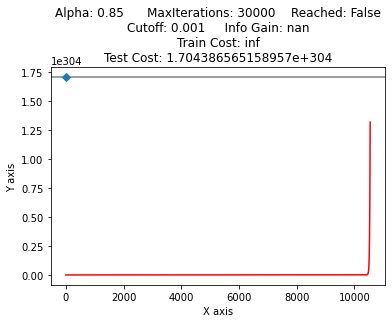

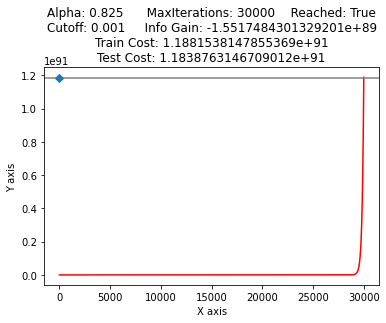

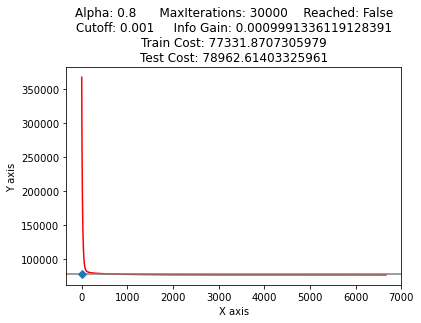

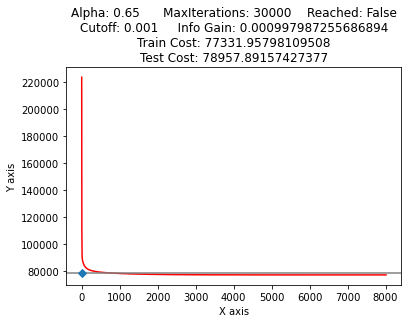

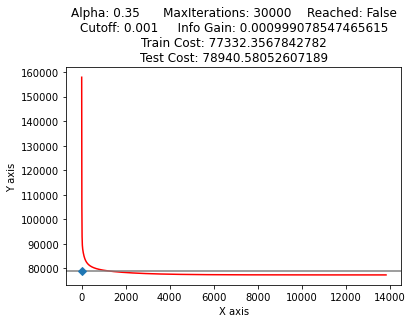

In [19]:

StartXColumn = 1 #Location of first X variable X0
EndXColumn = 15 #Location of last X variable
YColumn = 0 #location of target to estimate



LearningRate = .85 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .825 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .800 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .35 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


### Iterations = 10000

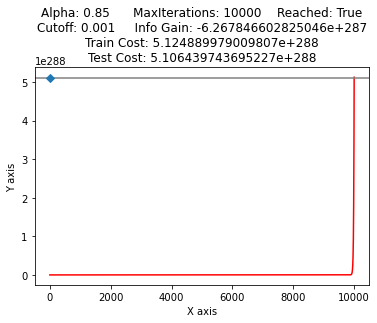

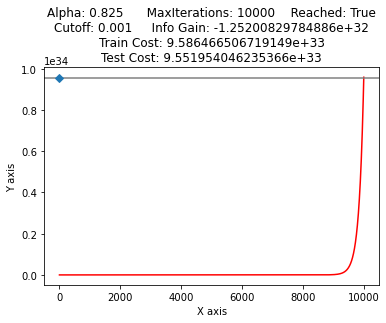

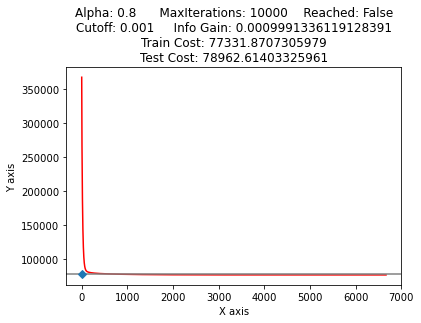

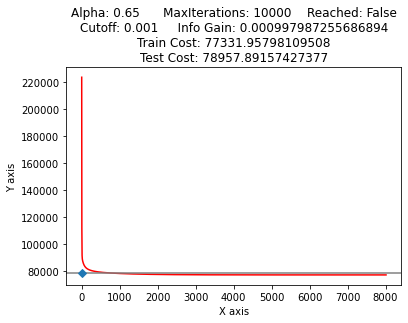

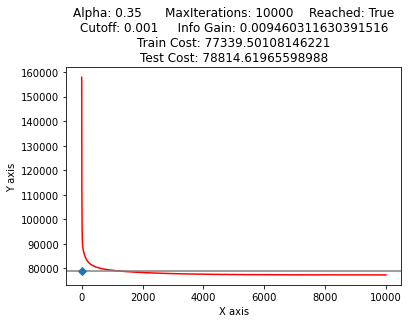

In [20]:
LearningRate = .85 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .825 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .800 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .35 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


### Iterations = 1000

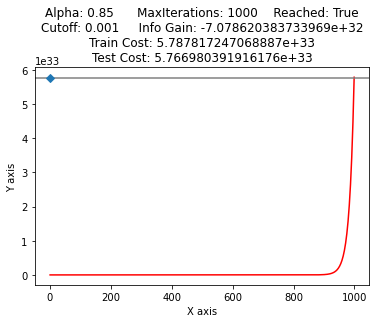

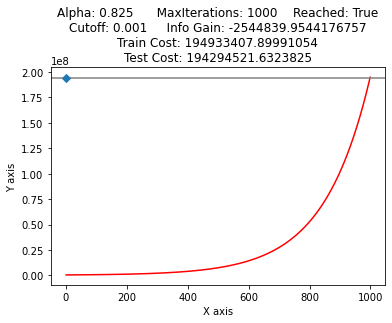

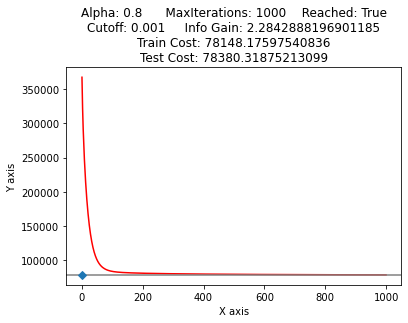

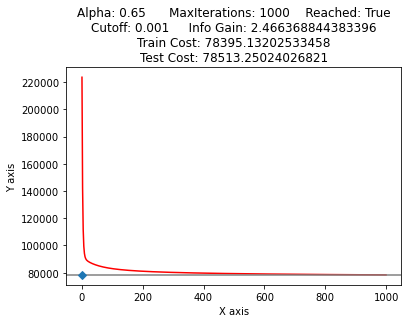

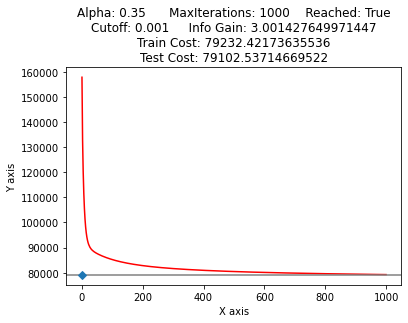

In [21]:
LearningRate = .85 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =1000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .825 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =1000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .800 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =1000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =1000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .35 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =1000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


### Iterations = 50

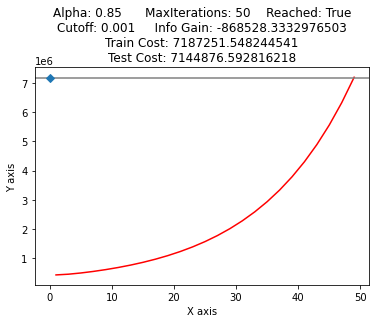

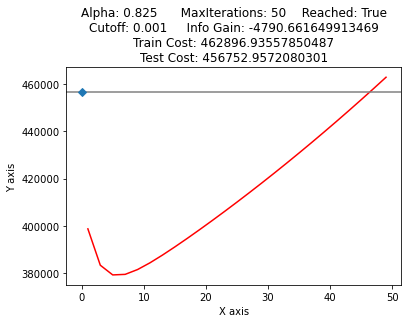

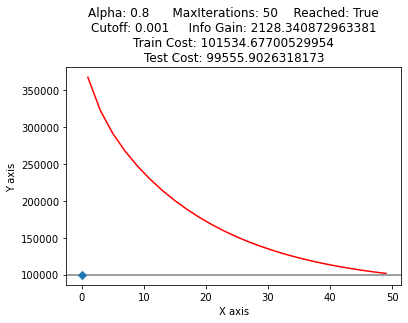

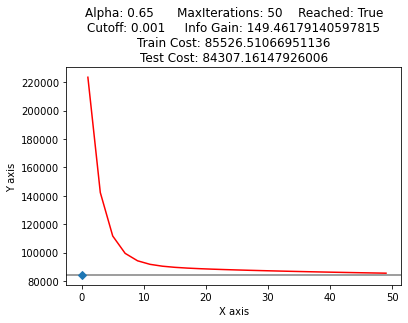

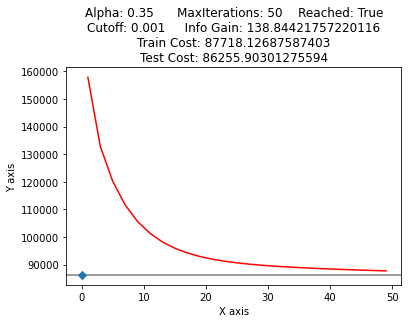

In [22]:
LearningRate = .85 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =50
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .825 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =50
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .800 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =50
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =50
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .35 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =50
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


alpha: 0.8
ConvergenceTarget: 0.001
MaxIterations: 10000
# of Train Set Observations: 6132
# of Test Set Observations: 2628
Number of Variables: 14
Initial Beta Value Settings: 


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

Ending Betas: 



[-530.268796881799,
 24.066682241947507,
 462.5576890130038,
 269.1882827731879,
 77.71068906680651,
 -382.98838465939934,
 -123.4210934105396,
 12.827352653161597,
 335.9771257911681,
 -104.41451316234159,
 -1885.2996432656275,
 61.01077133057917,
 607.4729300553315,
 -96.92148479336397,
 844.7965214264117]

Information Gain: 0.0009991336119128391
Starting Cost Value: 367522.3932791358
Ending Cost Value: 77331.8707305979


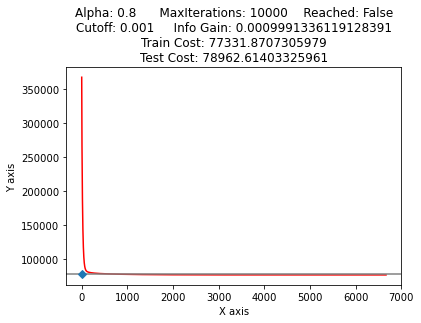

Test Cost:78962.61403325961


In [23]:
LearningRate = .8 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=True)


# Experiment 2
Experiment with various thresholds for convergence for linear and regression. Plot error results
for train and test sets as a function of threshold and describe how varying the threshold affects
error. Pick your best threshold and plot train and test error (in one figure) as a function of
number of gradient descent iterations.


### LearningRate = .80

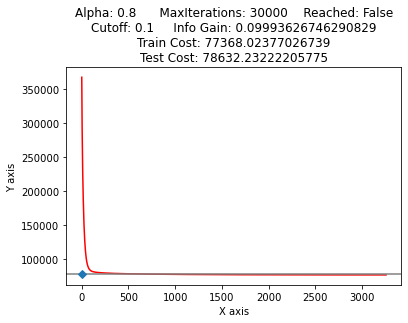

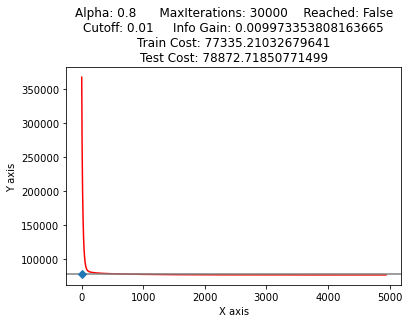

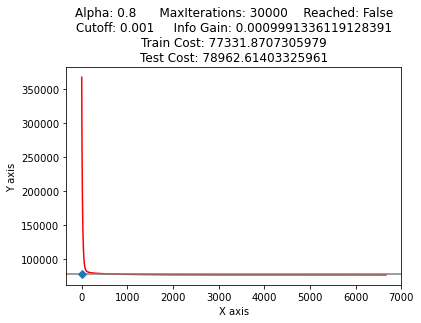

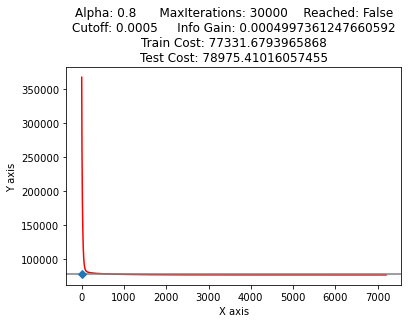

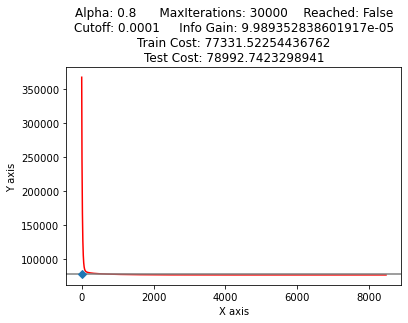

In [24]:
LearningRate = .80 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .1 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .80 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .01 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .80 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .80 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0005 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .80 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


### LearningRate = .65

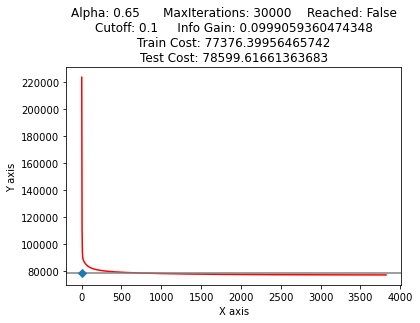

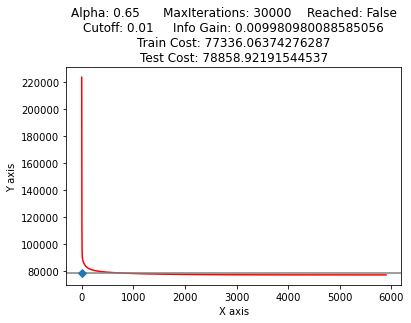

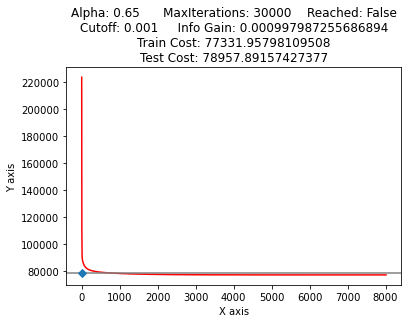

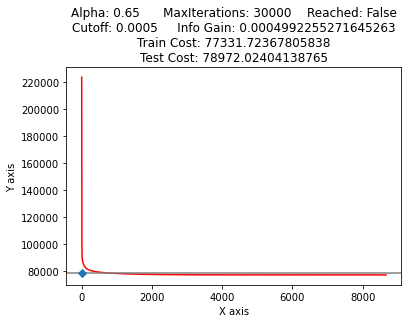

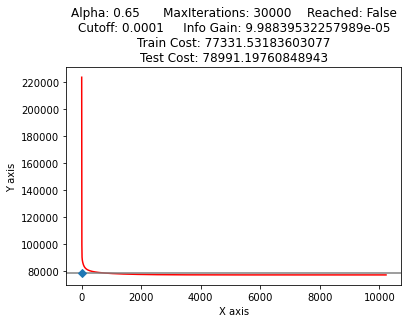

In [25]:
LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .1 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .01 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0005 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0001 #establishing Convergence cutoff
MaxIterations =30000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


# Experiment 3

Pick eight features randomly and retrain your model only on these eight features. Compare train
and test error results for the case of using your original set of all features and eight random
features. Report the eight randomly selected features.


In [26]:
import random
random.seed(2019)
list = random.sample(["DOWAdjust","HourRank","PeakHours","Temperature(dC)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Dew point temperature(dC)","Solar Radiation (MJ/m2)","Rainfall(mm)","Snowfall (cm)","SeasonalMeanAdj","Holiday","Functioning Day"], k=6)
print("Dropping the following Randomly Selected Columns: \n",list)

RandomDropBikeData = pdBikeData.copy()
RandomDropBikeData.drop(columns = list, axis = 1, inplace = True)
display(RandomDropBikeData)

X_train, X_test, y_train, y_test = train_test_split(RandomDropBikeData, RandomDropBikeData['Rented Bike Count'], test_size = 0.3, random_state=42)

Dropping the following Randomly Selected Columns: 
 ['Functioning Day', 'PeakHours', 'Temperature(dC)', 'Dew point temperature(dC)', 'Holiday', 'SeasonalMeanAdj']


,Rented Bike Count,X0,DOWAdjust,HourRank,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,1,0.626,-0.481,-0.533,0.082,1.000,-0.198,-0.006,-0.009
1,204,1,0.626,-0.568,-0.508,-0.165,1.000,-0.198,-0.006,-0.009
2,173,1,0.626,-0.655,-0.483,-0.129,1.000,-0.198,-0.006,-0.009
3,107,1,0.626,-0.829,-0.458,-0.147,1.000,-0.198,-0.006,-0.009
4,78,1,0.626,-1.003,-0.558,0.100,1.000,-0.198,-0.006,-0.009
...,...,...,...,...,...,...,...,...,...,...
8755,1003,1,1.000,0.913,-0.609,0.153,0.811,-0.198,-0.006,-0.009
8756,764,1,1.000,0.739,-0.533,0.100,1.000,-0.198,-0.006,-0.009
8757,694,1,1.000,0.652,-0.483,-0.253,0.943,-0.198,-0.006,-0.009
8758,712,1,1.000,0.390,-0.433,-0.129,0.749,-0.198,-0.006,-0.009


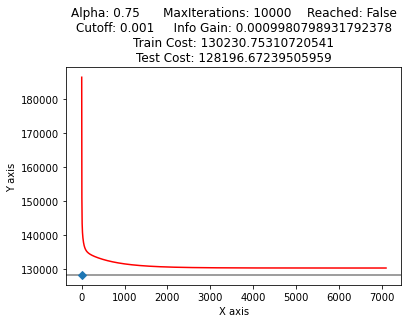

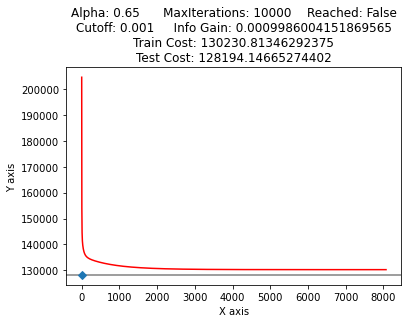

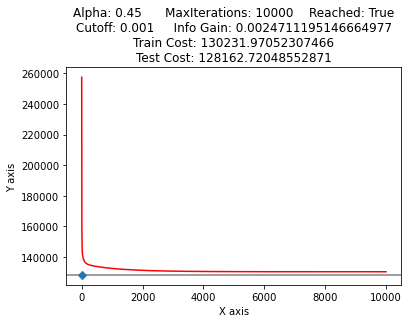

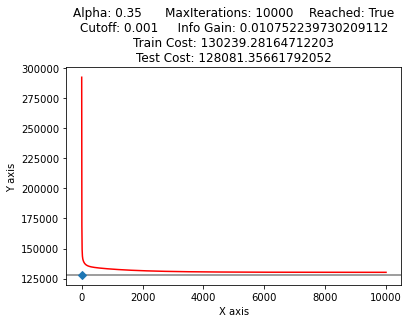

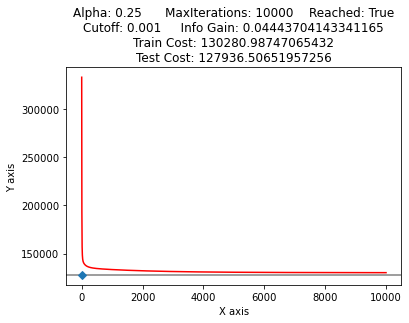

In [27]:
LearningRate = .75 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .45 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .35 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .25 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =10000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


alpha: 0.65
ConvergenceTarget: 0.0001
MaxIterations: 11000
# of Train Set Observations: 6132
# of Test Set Observations: 2628
Number of Variables: 8
Initial Beta Value Settings: 


[1, 1, 1, 1, 1, 1, 1, 1, 1]

Ending Betas: 



[706.6350293542077,
 46.92662329994262,
 592.0051407161039,
 189.2093757847569,
 -413.79012645523227,
 104.61161590881254,
 488.1660864775291,
 -1904.221962617603,
 -1354.8525168742326]

Information Gain: 9.981406037695706e-05
Starting Cost Value: 204616.14744640441
Ending Cost Value: 130230.40753458855


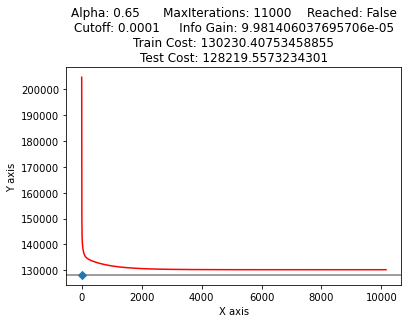

Test Cost:128219.5573234301


In [28]:
LearningRate = .65 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0001 #establishing Convergence cutoff
MaxIterations =11000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=True)


#print(random_list.sort(reverse = True))
RandomBikeData

# Experiment 4
Now pick eight features that you think are best suited to predict the output, and retrain your
model using these eight features. Compare to the case of using your original set of features and
to the random features case. Did your choice of features provide better results than picking
random features? Why? Did your choice of features provide better results than using all
features? Why?

        "DOWAdjust",
"HourRank",
"PeakHours",
        "Temperature(dC)",
"Humidity(%)",
        "Wind speed (m/s)",
        "Visibility (10m)",
        "Dew point temperature(dC)",
        "Solar Radiation (MJ/m2)",
"Rainfall(mm)",
"Snowfall (cm)",
"SeasonalMeanAdj",
"Holiday",
"Functioning Day"

In [29]:
import random
random.seed(42)
list = ["DOWAdjust","Wind speed (m/s)","Visibility (10m)","Dew point temperature(dC)","Solar Radiation (MJ/m2)","Temperature(dC)"]
print("Dropping the following Columns: \n",list)

Choosen8BikeData = pdBikeData.copy()
Choosen8BikeData.drop(columns = list, axis = 1, inplace = True)
display(Choosen8BikeData)

X_train, X_test, y_train, y_test = train_test_split(Choosen8BikeData, Choosen8BikeData['Rented Bike Count'], test_size = 0.3, random_state=42)

Dropping the following Columns: 
 ['DOWAdjust', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(dC)', 'Solar Radiation (MJ/m2)', 'Temperature(dC)']


,Rented Bike Count,X0,HourRank,PeakHours,Humidity(%),Rainfall(mm),Snowfall (cm),SeasonalMeanAdj,Holiday,Functioning Day
0,254,1,-0.481,0,-0.533,-0.006,-0.009,0.217,0,1
1,204,1,-0.568,0,-0.508,-0.006,-0.009,0.217,0,1
2,173,1,-0.655,0,-0.483,-0.006,-0.009,0.217,0,1
3,107,1,-0.829,0,-0.458,-0.006,-0.009,0.217,0,1
4,78,1,-1.003,0,-0.558,-0.006,-0.009,0.217,0,1
...,...,...,...,...,...,...,...,...,...,...
8755,1003,1,0.913,0,-0.609,-0.006,-0.009,0.797,0,1
8756,764,1,0.739,0,-0.533,-0.006,-0.009,0.797,0,1
8757,694,1,0.652,0,-0.483,-0.006,-0.009,0.797,0,1
8758,712,1,0.390,0,-0.433,-0.006,-0.009,0.797,0,1


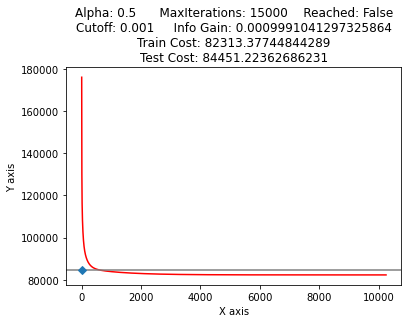

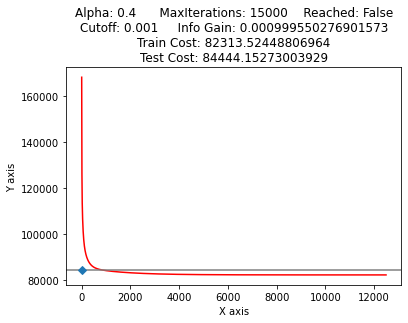

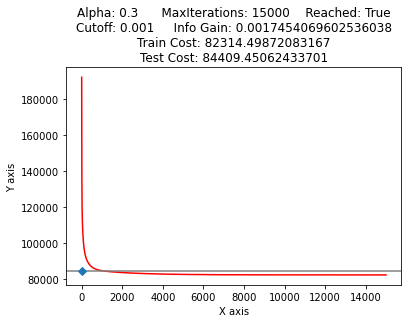

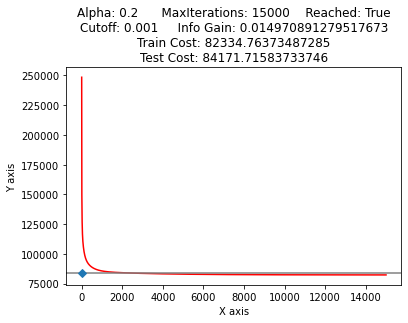

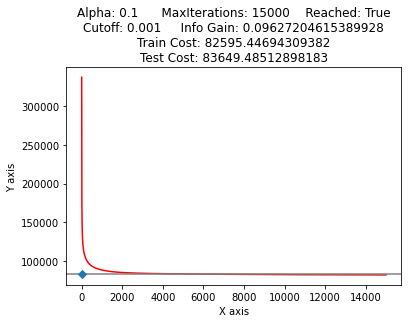

In [30]:
LearningRate = .5 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =15000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .4 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =15000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


LearningRate = .3 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =15000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .2 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =15000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)

LearningRate = .1 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .001 #establishing Convergence cutoff
MaxIterations =15000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)


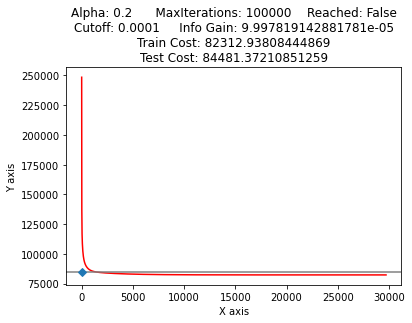

In [31]:
LearningRate = .2 #establishing Learning Rate Hyperparameter
ConvergenceTarget = .0001 #establishing Convergence cutoff
MaxIterations =100000
GradientDescentAlgorithm (X_train.iloc[:,1:], X_test.iloc[:,1:], y_train, y_test, LearningRate, ConvergenceTarget, MaxIterations, ShowWork=False)
